## Request 

In [2]:
# 네이버 연결 확인

import requests

res = requests.get('http://www.naver.com')

In [5]:
print('status_code : ', res.status_code) # 정상 == 200

status_code :  200


In [7]:
#  연결 에러 처리

res = requests.get('http://yyy.tistory.com')
res.status_code # 404 == not found

if res.status_code == requests.codes.ok:
    print('정상')
else:
    print(f'오류 : {res.status_code}')

오류 : 404


In [13]:
res = requests.get('http://naver.com')

res.raise_for_status() # 이상 발생시 break하고 error 발생, 정상일 경우 다음으로 진행하는 구문
                        # 주소 이상이나 다양한 이상 상태 발생시 이 구문이 없다면 code로만 확인이 가능했을 것

print('정상')
print(len(res.text)) # res.text == 접근한 html에서 불러온 html 코드들의 총 갯수

정상
200529


In [14]:
#  urlopen

from urllib.request import urlopen

url = 'http://www.naver.com'

html = urlopen(url)

print(html.read())

b'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d

In [15]:
# errorHttp

from urllib.request import urlopen
from urllib.request import HTTPError

try : 
    html = urlopen('http://www.google.com/kim.html')

except HTTPError as e: # html을 urlopen 하는 과정중에 httperror 발생시 이를 e에 담아주는 구문
                        # httperror는 server에 접속은 했지만 내부에 kim.html이 없을 때 (올바른 주소 내의 문서를 찾지 못했을 때 발생)
    print(e)

else:
    print('성공')

HTTP Error 404: Not Found


In [16]:
# errorURL

from urllib.request import URLError

try : 
    html = urlopen('http://www.dddsdf.com/kim.html')

except HTTPError as e:
    print(e)

except URLError as e: # URLError는 서버에 접속조차 못 했을 때 발생 (주소값을 찾지 못했을 때 발생) 
    print('서버를 찾지 못함')

else:
    print('성공')

서버를 찾지 못함


## Beautifulsoup

scraping (parsing 후 데이터 추출)

In [17]:
from bs4 import BeautifulSoup as bs

html_str = '<html><div>hello</div></html>'

bs_obj = bs(html_str, 'html.parser') # str 형태의 데이터를 html parer로 파싱, html 문법을 지닌 str 데이터를 html 데이터인 것으로 보여줌
                                        # 크롤링 할 때는 requests.get(타겟 url) 등으로 html 문서를 불러온 후, 이를 .text 혹은 str 변환 방식들을 통해 타입을 변경하고 이를 다시 html 파싱하여 크롤링

In [21]:
print(type(html_str))

<class 'str'>


In [22]:
print(type(bs_obj))

<class 'bs4.BeautifulSoup'>


In [23]:
print(bs_obj.find('div'))

<div>hello</div>


In [24]:
html_str = '''
    <html>
        <body>
            <ul>
                <li>hello</li>
                <li>welcome</li>
                <li>bye</li>
            </ul>
        </body>
    </html>
'''

bs_obj = bs(html_str, 'html.parser') # beautifulsoup로 파싱
ul = bs_obj.find('ul') # beautifulsoup 데이터로 파싱된 상황에서 ul 태그 find
                        # (여기서 find는 str 객체에 사용되는 find 함수가 아니라 beautifulsoup에 내장된 find 함수로, 매개변수와 일치하는 첫 번째 tag 내용을 가져오는 함수임)
print(ul)

<ul>
<li>hello</li>
<li>welcome</li>
<li>bye</li>
</ul>


In [34]:
bs_obj.find('li').contents

bs_obj.find('li').text

'hello'

In [36]:
bs_obj.findAll('li')[0].text

'hello'

In [38]:
html_str = """

    <html>
        <body>
            <ul class = "greet">
                <li>hello</li>
                <li>bye</li>
                <li>welcome</li>
            </ul>
            <ul class = "reply">
                <li>ok</li>
                <li>no</li>
                <li>sure</li>
            </ul>
        </body>
    </html>
"""

bs_obj = bs(html_str, 'html.parser')
ul = bs_obj.find('ul') # find가 첫 번째 tag만을 return 하기에 두 번째 ul까지 가져오지 못함. 
print(ul)

<ul class="greet">
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>


In [39]:
# class로 데이터 찾기

bs_obj = bs(html_str, 'html.parser')

ul = bs_obj.find('ul', {'class' : 'reply'})

print(ul)

<ul class="reply">
<li>ok</li>
<li>no</li>
<li>sure</li>
</ul>


In [40]:
# TAG로 데이터 찾기

html_str = """
<html>
    <body>
        <ul class = "ko">
            <li>
                <a href = "http://www.naver.com/">네이버</a>
            </li>
            <li>
                <a href = "http://www.daum.com/">다음</a>
            </li>
        </ul>
        <ul class = "sns">
            <li>
                <a href = "http://www.google.com/">구글</a>
            </li>
            <li>
                <a href = "http://www.facebook.com/">페이스북</a>
            </li>
        </ul>
    </body>
</html>
"""


bs_obj = bs(html_str, 'html.parser')
atag = bs_obj.find('a')
print(atag)
print(atag['href'])

<a href="http://www.naver.com/">네이버</a>
http://www.naver.com/


In [49]:
# 구글 url과 '구글' 뽑기

bs_obj = bs(html_str, 'html.parser')
sns = bs_obj.find('ul', {'class' : 'sns'})
sns_g_url = sns.find('a')['href']
sns_g_content = sns.find('a').text # 이거 'li'로 찾아도 됨
print(sns_g_url, sns_g_content)

http://www.google.com/ 구글


In [63]:
# 방법 2

sns_li = sns.findAll('li')
print(\
    sns_li[0].find('a')['href'],
    sns_li[0].text)

http://www.google.com/ 
구글



In [64]:
# 방법 3

sns_li = sns.findAll('a')
print(\
    sns_li,
    sns_li[0])

[<a href="http://www.google.com/">구글</a>, <a href="http://www.facebook.com/">페이스북</a>] <a href="http://www.google.com/">구글</a>


 응용 : 다음 영화 역대관객순위 Top5 image

In [123]:
from bs4 import BeautifulSoup as bs

# Crawlling

url = "https://search.daum.net/search?w=tot&q=2023%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84&DA=MOR&rtmaxcoll=MOR"

res = requests.get(url)

res.raise_for_status()

html_str = res.text

# Scrapping

_movie = bs(html_str, 'html.parser')

_target = _movie.find('c-flicking', {'id' : 'mor_history_id_0'}) # cnt + f 로 class 명이 같은 것들이 있는 지 확인 후 없는 녀석으로 찾던지 같은 녀석들 중의 순서로 찾던지 해야함

_target.find('c-title').contents # 하나만 나오는게 이상해 == 이거 페이지가 동적 페이지라서 requests로 못 받아오고 selenium으로 받아와야 해

# _target_under = _target.find('ul', {'class' : 'c-list-basic'})

# _target_under

# _target.find('strong', {'class' : 'tit-g clamp-g'})

[' 서울의 봄 ']

# Selenium

In [130]:
# !pip install webdriver-manager

In [135]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager # 크롬을 항상 최신버전으로 사용하게끔 하는 구문이었다 / 근데 왜 안씀 ???
from selenium.webdriver.chrome.service import Service
import time

service = Service() # Selenium class 호출
options = webdriver.ChromeOptions() # Chrome 브라우저의 옵션을 설정
driver = webdriver.Chrome(service= service, options= options) # Chrome 브라우저 실행

In [136]:
sec = 2

url = 'http://www.naver.com'

# driver는 Chrome을 제어할 수 있는 selenium임

driver.get(url)

In [134]:
time.sleep(sec)
driver.back()
time.sleep(sec)
driver.forward()
time.sleep(sec)
driver.refresh()
time.sleep(sec)
driver.back()

In [137]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [141]:
search_element = driver.find_element(By.ID, 'query')
search_element.send_keys('컴퓨터')
search_element.send_keys(Keys.ENTER)

<html lang="ko"><head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge, chrome=1">
    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no">
    <meta property="og:type" content="website">
    <meta property="og:title" content="네이버">
    <meta property="og:description" content="네이버에 로그인 하고 나를 위한 다양한 서비스를 이용해 보세요">
    <meta property="og:image" content="https://ssl.pstatic.net/static/nid/account/naver_og_image.png">
    <meta property="og:image:type" content="image/png">
    <meta property="og:image:width" content="1200">
    <meta property="og:image:height" content="630">
    <title>네이버 : 로그인</title>
    <link rel="stylesheet" type="text/css" href="/login/css/global/desktop/w_20220216.css?20210812">
<link id="rcapt_css" rel="stylesheet" type="text/css" href="https://rcaptcha.nid.naver.com/rcaptCss?key=8MMWesJx7PHh9I" media="all"><script type="text/javascript" src="https://ssl.pstatic.net/tveta/libs
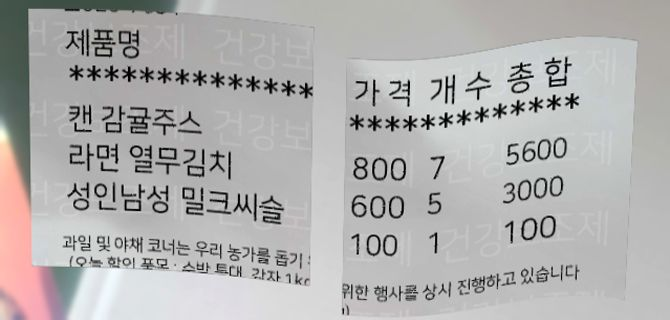

In [143]:
url = 'http://www.naver.com'

service = Service() # Selenium class 호출
options = webdriver.ChromeOptions() # Chrome 브라우저의 옵션을 설정
driver = webdriver.Chrome(service= service, options= options) # Chrome 브라우저 실행


try:
    # 네이버 이동
    driver.get(url)
    # 로그인 버튼 클릭
    element = driver.find_element(By.CLASS_NAME, 'MyView-module__link_login___HpHMW') 
    element.click()

    # id, pass 입력
    driver.find_element(By.ID, 'id').send_keys('egrucrown')
    driver.find_element(By.ID, 'pw').send_keys('noneplayon3#')

    # 로그인 버튼 클릭
    driver.find_element(By.ID, 'log.login').click()
    print(driver.page_source)

except Exception as e: # Exception == 모든 예외 클래스의 기본 클래스, 모든 예외를 e로 처리하겠다는 것. 
    print(e)